In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')
# File to Load (Remember to Change These)
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")
# Read the Mouse and Drug Data and the Clinical Trial Data

#mouse_data.head()
#clinical_data.head()

# Combine the data into a single dataset
combined = pd.merge(clinical_data,mouse_data, how = "left",
                   on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
combined.head(3)
#combined.index
#combined.columns

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril


Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Mean_Tumor  = combined.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
Mean_Tumor_df = Mean_Tumor.to_frame()
Mean_Tumor_df = Mean_Tumor_df.rename(columns={"Tumor Volume (mm3)":"Mean_Tumor_Volume"})
Mean_Tumor_df = Mean_Tumor_df.reset_index()
Mean_Tumor_df.head(5)

,Drug,Timepoint,Mean_Tumor_Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SEM_Tumor  = combined.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
SEM_Tumor_df = SEM_Tumor.to_frame()
SEM_Tumor_df = SEM_Tumor_df.rename(columns={"Tumor Volume (mm3)":"SE_of_Tumor_Volume"})
SEM_Tumor_df = SEM_Tumor_df.reset_index()

SEM_Tumor_df.head(5)

,Drug,Timepoint,SE_of_Tumor_Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
df = Mean_Tumor_df.pivot(index='Timepoint',columns='Drug',values='Mean_Tumor_Volume')
df.head(10)
df.columns
df.index

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'Tumor Response to Treatment')

Text(0.5, 0, 'Time (Days)')

Text(0, 0.5, 'Tumor Volume (mm3)')

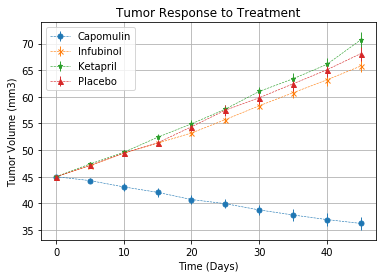

In [16]:
# Generate the Plot (with Error Bars)
#plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

Drugs = df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

x_axis = df.index.values

Cap_SEM = SEM_Tumor_df.loc[SEM_Tumor_df['Drug']=='Capomulin']
Cap_SEM = Cap_SEM["SE_of_Tumor_Volume"]
Inf_SEM = SEM_Tumor_df.loc[SEM_Tumor_df['Drug']=='Infubinol']
Inf_SEM = Inf_SEM["SE_of_Tumor_Volume"]
Ket_SEM = SEM_Tumor_df.loc[SEM_Tumor_df['Drug']=='Ketapril']
Ket_SEM = Ket_SEM["SE_of_Tumor_Volume"]
Pla_SEM = SEM_Tumor_df.loc[SEM_Tumor_df['Drug']=='Placebo']
Pla_SEM = Pla_SEM["SE_of_Tumor_Volume"]

Cap_MN = Drugs["Capomulin"]
Inf_MN = Drugs["Infubinol"]
Ket_MN = Drugs["Ketapril"]
Pla_MN = Drugs["Placebo"]

fig, ax = plt.subplots()
#kwargs = dict(ecolor='k', color='k', capsize=2,
              #elinewidth=1.1, linewidth=0.6, ms=7)

ax.errorbar(x_axis, Drugs["Capomulin"], yerr = Cap_SEM, fmt="o",ls='-',linewidth=0.6,linestyle='dashed',elinewidth=0.95,markersize=5)
ax.errorbar(x_axis, Drugs["Infubinol"], yerr = Inf_SEM, fmt="x",ls='-',linewidth=0.6,linestyle='dashed',elinewidth=0.95,markersize=5)
ax.errorbar(x_axis, Drugs["Ketapril"], yerr = Ket_SEM, fmt="*",ls='-',linewidth=0.6,linestyle='dashed',elinewidth=0.95,markersize=5)
ax.errorbar(x_axis, Drugs["Placebo"], yerr = Pla_SEM, fmt="^",ls='-',linewidth=0.6,linestyle='dashed',elinewidth=0.95,markersize=5)

# Adding legend to the plot    
ax.legend(loc='best', frameon=True)
ax.set_title('Tumor Response to Treatment', fontsize=12)
ax.set_xlabel('Time (Days)', fontsize=10)
ax.set_ylabel('Tumor Volume (mm3)', fontsize=10)
ax.grid(True)
plt.savefig("Tumor Response to Treatment")
plt.show()


## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Mean_Met  = combined.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
Mean_Met_df = Mean_Met.to_frame()
Mean_Met_df.head(5)
Mean_Met_df = Mean_Met_df.rename(columns={"Metastatic Sites":"Mean_Metastatic_Sites"})
Mean_Met_df = Mean_Met_df.reset_index()
Mean_Met_df.head(5)



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

,Drug,Timepoint,Mean_Metastatic_Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SEM_Met  = combined.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
SEM_Met_df = SEM_Met.to_frame()
SEM_Met_df = SEM_Met_df.rename(columns={"Metastatic Sites":"SE_of_Metastatic Sites"})
SEM_Met_df = SEM_Met_df.reset_index()

SEM_Met_df.head(5)
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,SE_of_Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames
dff = Mean_Met_df.pivot(index='Timepoint',columns='Drug',values='Mean_Metastatic_Sites')
dff.head(10)
dff.columns
dff.index
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'Metastatic Spread During Treatment')

Text(0.5, 0, 'Treatment Duration (Days)')

Text(0, 0.5, 'Met.Sites')

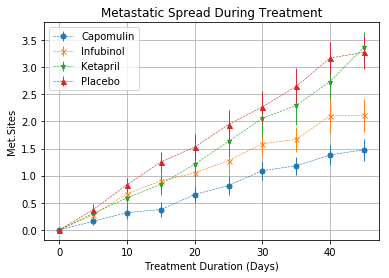

In [17]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
# Generate the Plot (with Error Bars)
Drugs = dff[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

x_axis = dff.index.values

Cap_SEM = SEM_Met_df.loc[SEM_Met_df['Drug']=='Capomulin']
Cap_SEM = Cap_SEM["SE_of_Metastatic Sites"]
Inf_SEM = SEM_Met_df.loc[SEM_Met_df['Drug']=='Infubinol']
Inf_SEM = Inf_SEM["SE_of_Metastatic Sites"]
Ket_SEM = SEM_Met_df.loc[SEM_Met_df['Drug']=='Ketapril']
Ket_SEM = Ket_SEM["SE_of_Metastatic Sites"]
Pla_SEM = SEM_Met_df.loc[SEM_Met_df['Drug']=='Placebo']
Pla_SEM = Pla_SEM["SE_of_Metastatic Sites"]

Cap_MN = Drugs["Capomulin"]
Inf_MN = Drugs["Infubinol"]
Ket_MN = Drugs["Ketapril"]
Pla_MN = Drugs["Placebo"]

fig, ax = plt.subplots()
#kwargs = dict(ecolor='k', color='k', capsize=2,
              #elinewidth=1.1, linewidth=0.6, ms=7)

ax.errorbar(x_axis, Cap_MN, Cap_SEM, fmt="o",ls='-',linewidth=0.6,linestyle='dashed',elinewidth=0.95,markersize=5)
ax.errorbar(x_axis, Inf_MN, Inf_SEM, fmt="x",ls='-',linewidth=0.6,linestyle='dashed',elinewidth=0.95,markersize=5)
ax.errorbar(x_axis, Ket_MN, Ket_SEM, fmt="*",ls='-',linewidth=0.6,linestyle='dashed',elinewidth=0.95,markersize=5)
ax.errorbar(x_axis, Pla_MN, Pla_SEM, fmt="^",ls='-',linewidth=0.6,linestyle='dashed',elinewidth=0.95,markersize=5)

# Adding legend to the plot    
ax.legend(loc='best', frameon=True)
ax.set_title('Metastatic Spread During Treatment', fontsize=12)
ax.set_xlabel('Treatment Duration (Days)', fontsize=10)
ax.set_ylabel('Met.Sites', fontsize=10)
ax.grid(True)
plt.savefig("Metastatic Spread During Treatment")
plt.show()

## Survival Rates

In [21]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mouse_Count  = combined.groupby(["Drug","Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
Mouse_df = Mouse_Count.to_frame()
Mouse_df = Mouse_df.rename(columns={"Mouse ID":"Mouse_Count"})
Mouse_df = Mouse_df.reset_index()
Mouse_df.head(3)
# Preview DataFrame


,Drug,Timepoint,Mouse_Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25


In [23]:
# Minor Data Munging to Re-Format the Data Frames
Mouse_dff = Mouse_df.pivot(index='Timepoint',columns='Drug',values='Mouse_Count')
Mouse_dff.head(5)
Mouse_dff.columns
Mouse_dff.index
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [27]:
# Generate the Plot (Accounting for percentages)
x_axis = Mouse_dff.index.values
x_axis

Mouse_Percentage = Mouse_dff.loc[Mouse_dff['Drug']=='Capomulin']/Mouse_dff['Capomulin'].sum()
#Cap_SEM = Cap_SEM["SE_of_Metastatic Sites"]


# Save the Figure

# Show the Figure
#plt.show()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

KeyError: 'Drug'

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()